In [20]:
import numpy
import pandas as pd
from sklearn import preprocessing
numpy.random.seed(10)

In [21]:
filepath="data/winequality-red.xls"
all_df=pd.read_excel(filepath)

In [22]:
all_df[:2]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [23]:
cols=['quality','fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide',
      'total sulfur dioxide','density','pH','sulphates','alcohol']
all_df=all_df[cols]  

In [24]:
all_df[:2]

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,5,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,5,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8


In [25]:
msk = numpy.random.rand(len(all_df)) < 0.8
train_df=all_df[msk]
test_df=all_df[~msk]

In [26]:
print('total:',len(all_df),
      'train:',len(train_df),
      'test:',len(test_df)) 

total: 1599 train: 1271 test: 328


In [27]:
all_df.isnull().sum()

quality                 0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [28]:
def PreprocessData(raw_df):
    
    ndarray= all_df.values
    Features=ndarray[:,1:] 
    Label=ndarray[:,0]
    
    from sklearn import preprocessing
    minmax_scale=preprocessing.MinMaxScaler(feature_range=(0,1))
    scaledFeatures=minmax_scale.fit_transform(Features)
    
    return scaledFeatures,Label

In [29]:
train_Features,train_Label=PreprocessData(train_df)
test_Features,test_Label=PreprocessData(test_df)

In [30]:
train_Features[:4]

array([[0.24778761, 0.39726027, 0.        , 0.06849315, 0.10684474,
        0.14084507, 0.09893993, 0.56754772, 0.60629921, 0.13772455,
        0.15384615],
       [0.28318584, 0.52054795, 0.        , 0.11643836, 0.14357262,
        0.33802817, 0.2155477 , 0.49412628, 0.36220472, 0.20958084,
        0.21538462],
       [0.28318584, 0.43835616, 0.04      , 0.09589041, 0.13355593,
        0.1971831 , 0.16961131, 0.50881057, 0.40944882, 0.19161677,
        0.21538462],
       [0.5840708 , 0.10958904, 0.56      , 0.06849315, 0.10517529,
        0.22535211, 0.19081272, 0.58223201, 0.33070866, 0.1497006 ,
        0.21538462]])

In [31]:
train_Label[:4]

array([5., 5., 5., 6.])

In [32]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation,Flatten
from keras.layers.embeddings import Embedding

In [33]:
model=Sequential() 

In [34]:
model.add(Dense(units=32, input_dim=11, 
                kernel_initializer='uniform', 
                activation='relu'))

In [35]:
model.add(Dense(units=11, 
                kernel_initializer='uniform', 
                activation='softmax'))

In [36]:
model.add(Dense(units=1, 
                kernel_initializer='uniform', 
                activation='sigmoid'))

In [37]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                384       
_________________________________________________________________
dense_4 (Dense)              (None, 11)                363       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 12        
Total params: 759
Trainable params: 759
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',metrics=['accuracy'])

In [39]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=30, 
                         batch_size=60,verbose=2)

Train on 1279 samples, validate on 320 samples
Epoch 1/30
 - 1s - loss: 0.6391 - acc: 0.0000e+00 - val_loss: 0.5170 - val_acc: 0.0000e+00
Epoch 2/30
 - 0s - loss: 0.3988 - acc: 0.0000e+00 - val_loss: 0.2763 - val_acc: 0.0000e+00
Epoch 3/30
 - 0s - loss: 0.1401 - acc: 0.0000e+00 - val_loss: 0.0138 - val_acc: 0.0000e+00
Epoch 4/30
 - 0s - loss: -1.4662e-01 - acc: 0.0000e+00 - val_loss: -2.7871e-01 - val_acc: 0.0000e+00
Epoch 5/30
 - 0s - loss: -4.5768e-01 - acc: 0.0000e+00 - val_loss: -5.8662e-01 - val_acc: 0.0000e+00
Epoch 6/30
 - 0s - loss: -7.7394e-01 - acc: 0.0000e+00 - val_loss: -8.9317e-01 - val_acc: 0.0000e+00
Epoch 7/30
 - 0s - loss: -1.0871e+00 - acc: 0.0000e+00 - val_loss: -1.1979e+00 - val_acc: 0.0000e+00
Epoch 8/30
 - 0s - loss: -1.3957e+00 - acc: 0.0000e+00 - val_loss: -1.4940e+00 - val_acc: 0.0000e+00
Epoch 9/30
 - 0s - loss: -1.7012e+00 - acc: 0.0000e+00 - val_loss: -1.7973e+00 - val_acc: 0.0000e+00
Epoch 10/30
 - 0s - loss: -2.0212e+00 - acc: 0.0000e+00 - val_loss: -2.115

In [40]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train],color='blue')
    plt.plot(train_history.history[validation],color='magenta')
    plt.title('Train_history')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

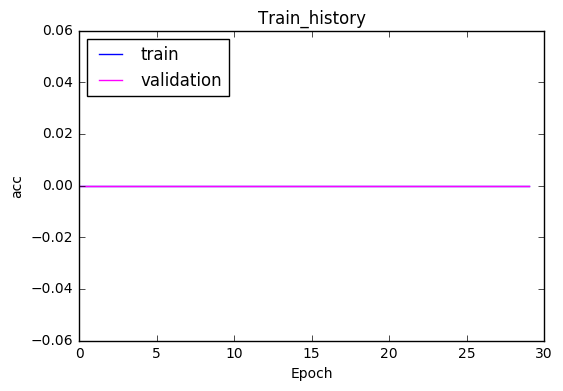

In [41]:
show_train_history(train_history,'acc','val_acc')

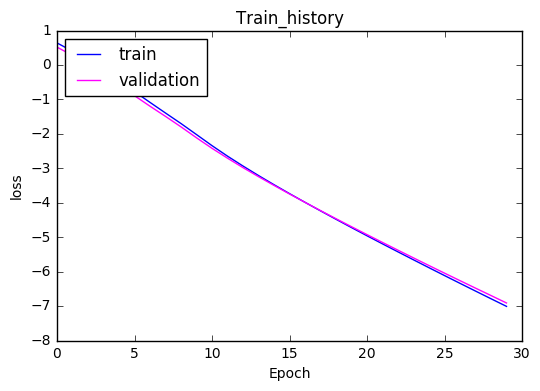

In [42]:
show_train_history(train_history,'loss','val_loss')

In [43]:
scores=model.evaluate(x=test_Features,
                     y=test_Label)

1599/1599 [==============================] - 0s 56us/step


In [44]:
scores[1]

0.0